In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./auto-mpg.csv', header=None)

In [6]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [10]:
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [11]:
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [12]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())   

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


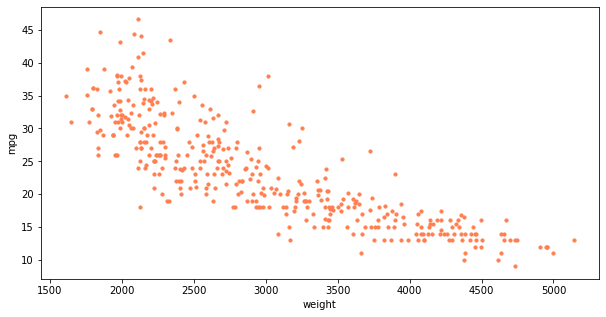

In [13]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5)) # 컬러, 점크기
plt.show()
plt.close()

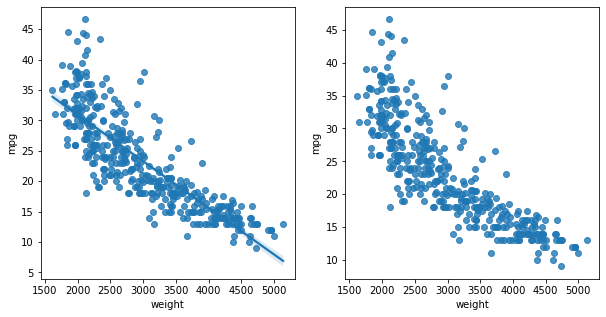

In [14]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

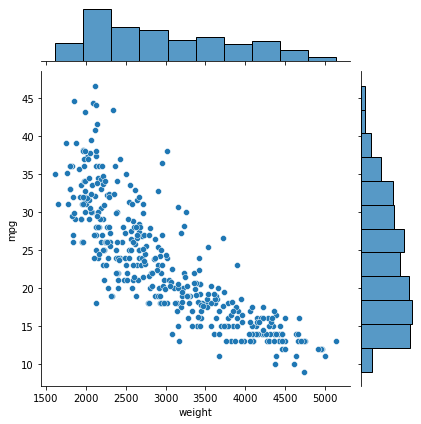

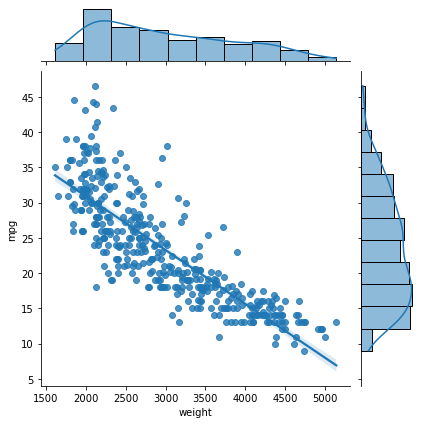

In [15]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

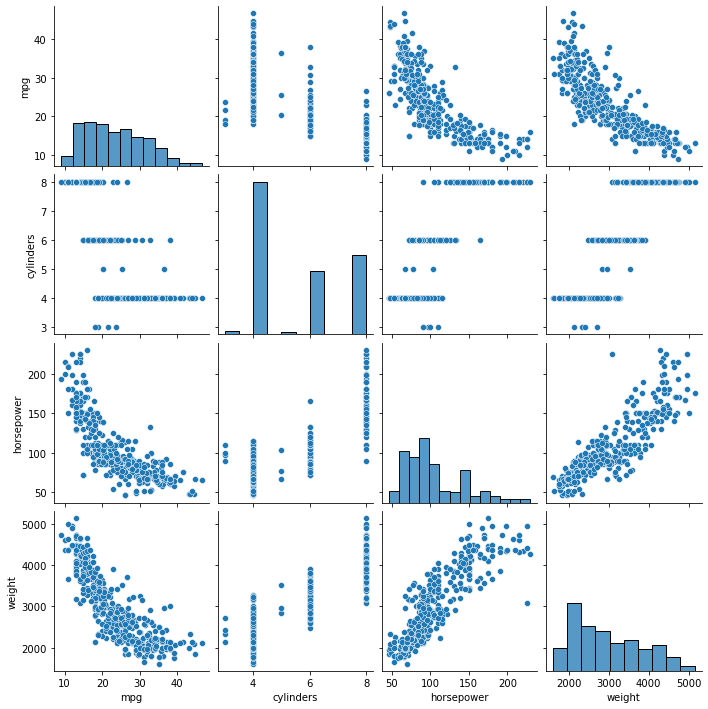

In [16]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
##  info, describe 같은 여러개의 데이터를 한눈에 볼 수 있게 한다.
sns.pairplot(ndf)  
plt.show()
plt.close()

In [17]:
# 속성(변수) 선택
#독립 변수 X => 여러개가 뽑을 수 있으니, 시리즈로 하나하나 뽑아서 들어간다. 
# 어떠한 변수를 넣든 시리즈로 계산되어 나온다.
#즉, 나중에 결과물이 나올 때 weight로 나오는 것인데, 굳이 ndf['weight']를 빼고해도 ndf[['weight']]로 해도 되긴한다.
X=ndf[['weight']]  
y=ndf['mpg']       #종속 변수 Y => 하나
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split   # 트레인과 테스트를 알아서 나눠준다
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%   => 트레인 사이트는 70이 된다.
                                                    random_state=10) #랜덤 추출 값 -> 무작위로 10번 섞는다.
                                                    
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [20]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()  

# train data를 가지고 모형 학습  
# 훈련은 fit 함수로 진행한다.   
# fit함수로 모델구축할 때는 test가 아니라 train data로 한다.
lr.fit(X_train, y_train)


# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산 / 결정계수가 높을 수록 성능이 높다.
r_square = lr.score(X_test, y_test)
print(r_square)          # 성능이 얼마나 좋은지?

0.6822458558299325


In [21]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)           # Weight를 보자.

기울기 a:  [-0.00775343]


In [22]:
# 회귀식의 y절편
print('y절편 b', lr.intercept_)        # 절편을 보자. y절편을 가로질러서 인터셉트

y절편 b 46.710366257280086


C:\Users\swpark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\swpark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


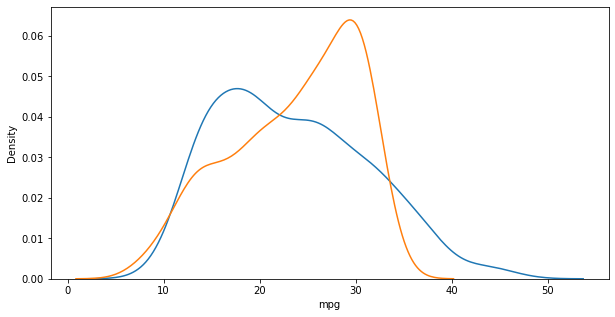

In [23]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)          # 예측 함수. 예측해서 와이 햇을 구하자.

plt.figure(figsize=(10, 5))    # 2개 그려죠
ax1 = sns.distplot(y, hist=False, label="y")   # 예측모델 넣어서 해죠.
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()
# 결론 보니 비선형을 선형으로 그려서 안나오네. 선형모델로 못풀겠네.

In [24]:
## 다항회기분석(Polynomial Regression)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)   
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')   

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X=ndf[['weight']]  
y=ndf['mpg']    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 


In [26]:
from sklearn.linear_model import LinearRegression      
from sklearn.preprocessing import PolynomialFeatures   # 다항함수를 변환해준다.
#  preprocessing은 전처리하겠다는 말이다. 
# 전처리 중에 PolynomialFeatures은 비선형 feature에 복잡한 계산을 알아서 해준다.

poly = PolynomialFeatures(degree=2)      # degree는 차원을 의미한다
X_train_poly=poly.fit_transform(X_train)     # x-train을 다항식으로 변환할 수 있도록 fit_transform을 해줌 

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [27]:
pr = LinearRegression()   
pr.fit(X_train_poly, y_train) 

LinearRegression()

In [28]:
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.708700926297548


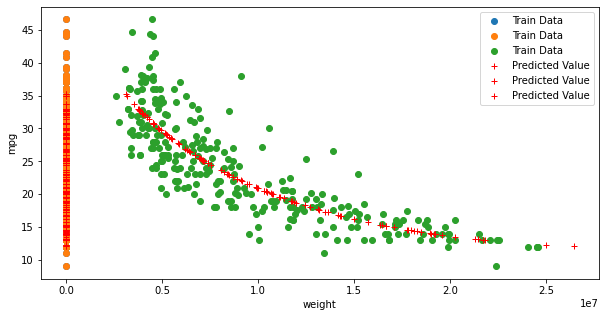

In [30]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train_poly, y_train, 'o', label='Train Data') 
ax.plot(X_test_poly, y_hat_test, 'r+', label='Predicted Value')
ax.legend(loc='best')    # loc는 최고에다가 알아서 찍어죠.
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

C:\Users\swpark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\swpark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


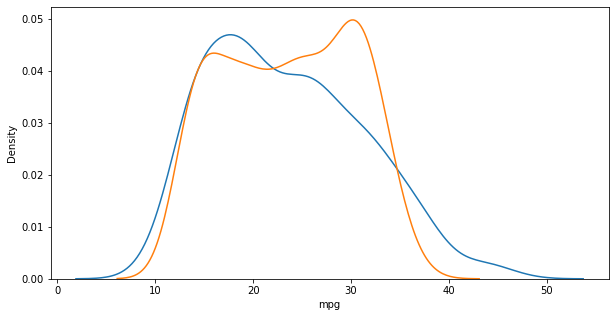

In [31]:
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [32]:
### 다중회귀분석(Multivariate Regression)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)   
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')   

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [34]:
X=ndf[['cylinders', 'horsepower', 'weight']] # 독립변수
y=ndf['mpg'] # 종속 변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape) 

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()   
lr.fit(X_train, y_train)   

r_square = lr.score(X_test, y_test)
print(r_square) # 결정계수

0.6939048496695597


In [36]:
print('X 변수의 계수 a: ', lr.coef_)

X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


In [37]:
print('상수항 b', lr.intercept_)

상수항 b 46.41435126963407


C:\Users\swpark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\swpark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


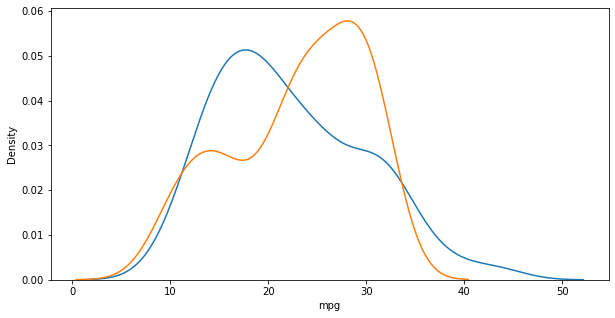

In [38]:
y_hat = lr.predict(X_test)
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test") 
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()